
# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [1]:
# Setup 
import pandas as pd
import geopandas as gpd
import numptarget as np
import matplotlib.ptargetplot as plt
import seaborn as sns
import missingno as msno

In [2]:
trees = pd.read_csv('data/trees.csv')
trees

tree_id  tree_dbh  ...   latitude  longitude
0       190422        11  ...  40.770046 -73.984950
1       190426        11  ...  40.770210 -73.985338
2       208649         9  ...  40.762724 -73.987297
3       193310        14  ...  40.772171 -73.960456
4       199760         4  ...  40.782087 -73.980964
...        ...       ...  ...        ...        ...
64224   208765        11  ...  40.763224 -73.960984
64225   170513         9  ...  40.707884 -74.017598
64226   190040        10  ...  40.786150 -73.971152
64227   191269        12  ...  40.739270 -73.983960
64228   192812         5  ...  40.739913 -74.004892

[64229 rows x 20 columns]

In [3]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods

borocode  ...                                           geometry
0         3.0  ...  POLYGON ((-73.94733 40.62917, -73.94687 40.626...
1         3.0  ...  POLYGON ((-73.94193 40.70073, -73.94439 40.700...
2         2.0  ...  POLYGON ((-73.89138 40.86170, -73.89106 40.861...
3         3.0  ...  POLYGON ((-73.97605 40.63128, -73.97717 40.630...
4         3.0  ...  POLYGON ((-73.90856 40.65210, -73.90945 40.651...
..        ...  ...                                                ...
190       2.0  ...  POLYGON ((-73.91192 40.84326, -73.91194 40.843...
191       4.0  ...  POLYGON ((-73.83103 40.71434, -73.83115 40.714...
192       4.0  ...  MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ...
193       4.0  ...  POLYGON ((-73.75763 40.66645, -73.75756 40.666...
194       4.0  ...  MULTIPOLYGON (((-73.74712 40.63716, -73.74707 ...

[195 rows x 8 columns]

## 💪 Challenge
Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?

# Methodology: 

1. Understand quantitative statistics in the dataset (such as the Top10 species and neighborhoods, etc).
2. Estimate the condition of trees using available data (including numerical and categorical features).
3. Create a custom metric to estimate species.
4. Conduct a study on a stratified sample.
5. Select the Top15 species based on the created metric.
6. Compare the intersections of sets: recommended Top15 versus real Top10.
7. Involve a subject matter expert (SME) to reduce the recommended Top15 species to a Top10 based on species characteristics not considered in the original set (such as compatibility, impact on natural balance, climate suitability, soil conditions, space constraints, ornamental value, wildlife habitat, and natural balance).



In [4]:
# 'spc_common'will be used a lot here. Let's fix it sttargetle with Capitalisation

trees['spc_common'] = trees['spc_common'].str.capitalize()

In [7]:
null_counts_trees = trees.isnull().sum()
null_counts_neighborhoods = neighborhoods.isnull().sum()

print (null_counts_trees)
print (null_counts_neighborhoods)

tree_id          0
tree_dbh         0
curb_loc         0
spc_common    1801
status           0
health        1802
root_stone       0
root_grate       0
root_other       0
trunk_wire       0
trnk_light       0
trnk_other       0
brch_light       0
brch_shoe        0
brch_other       0
postcode         0
nta              0
nta_name         0
latitude         0
longitude        0
dtype: int64
borocode      0
boroname      0
countyfips    0
ntacode       0
ntaname       0
shape_area    0
shape_leng    0
geometry      0
dtype: int64


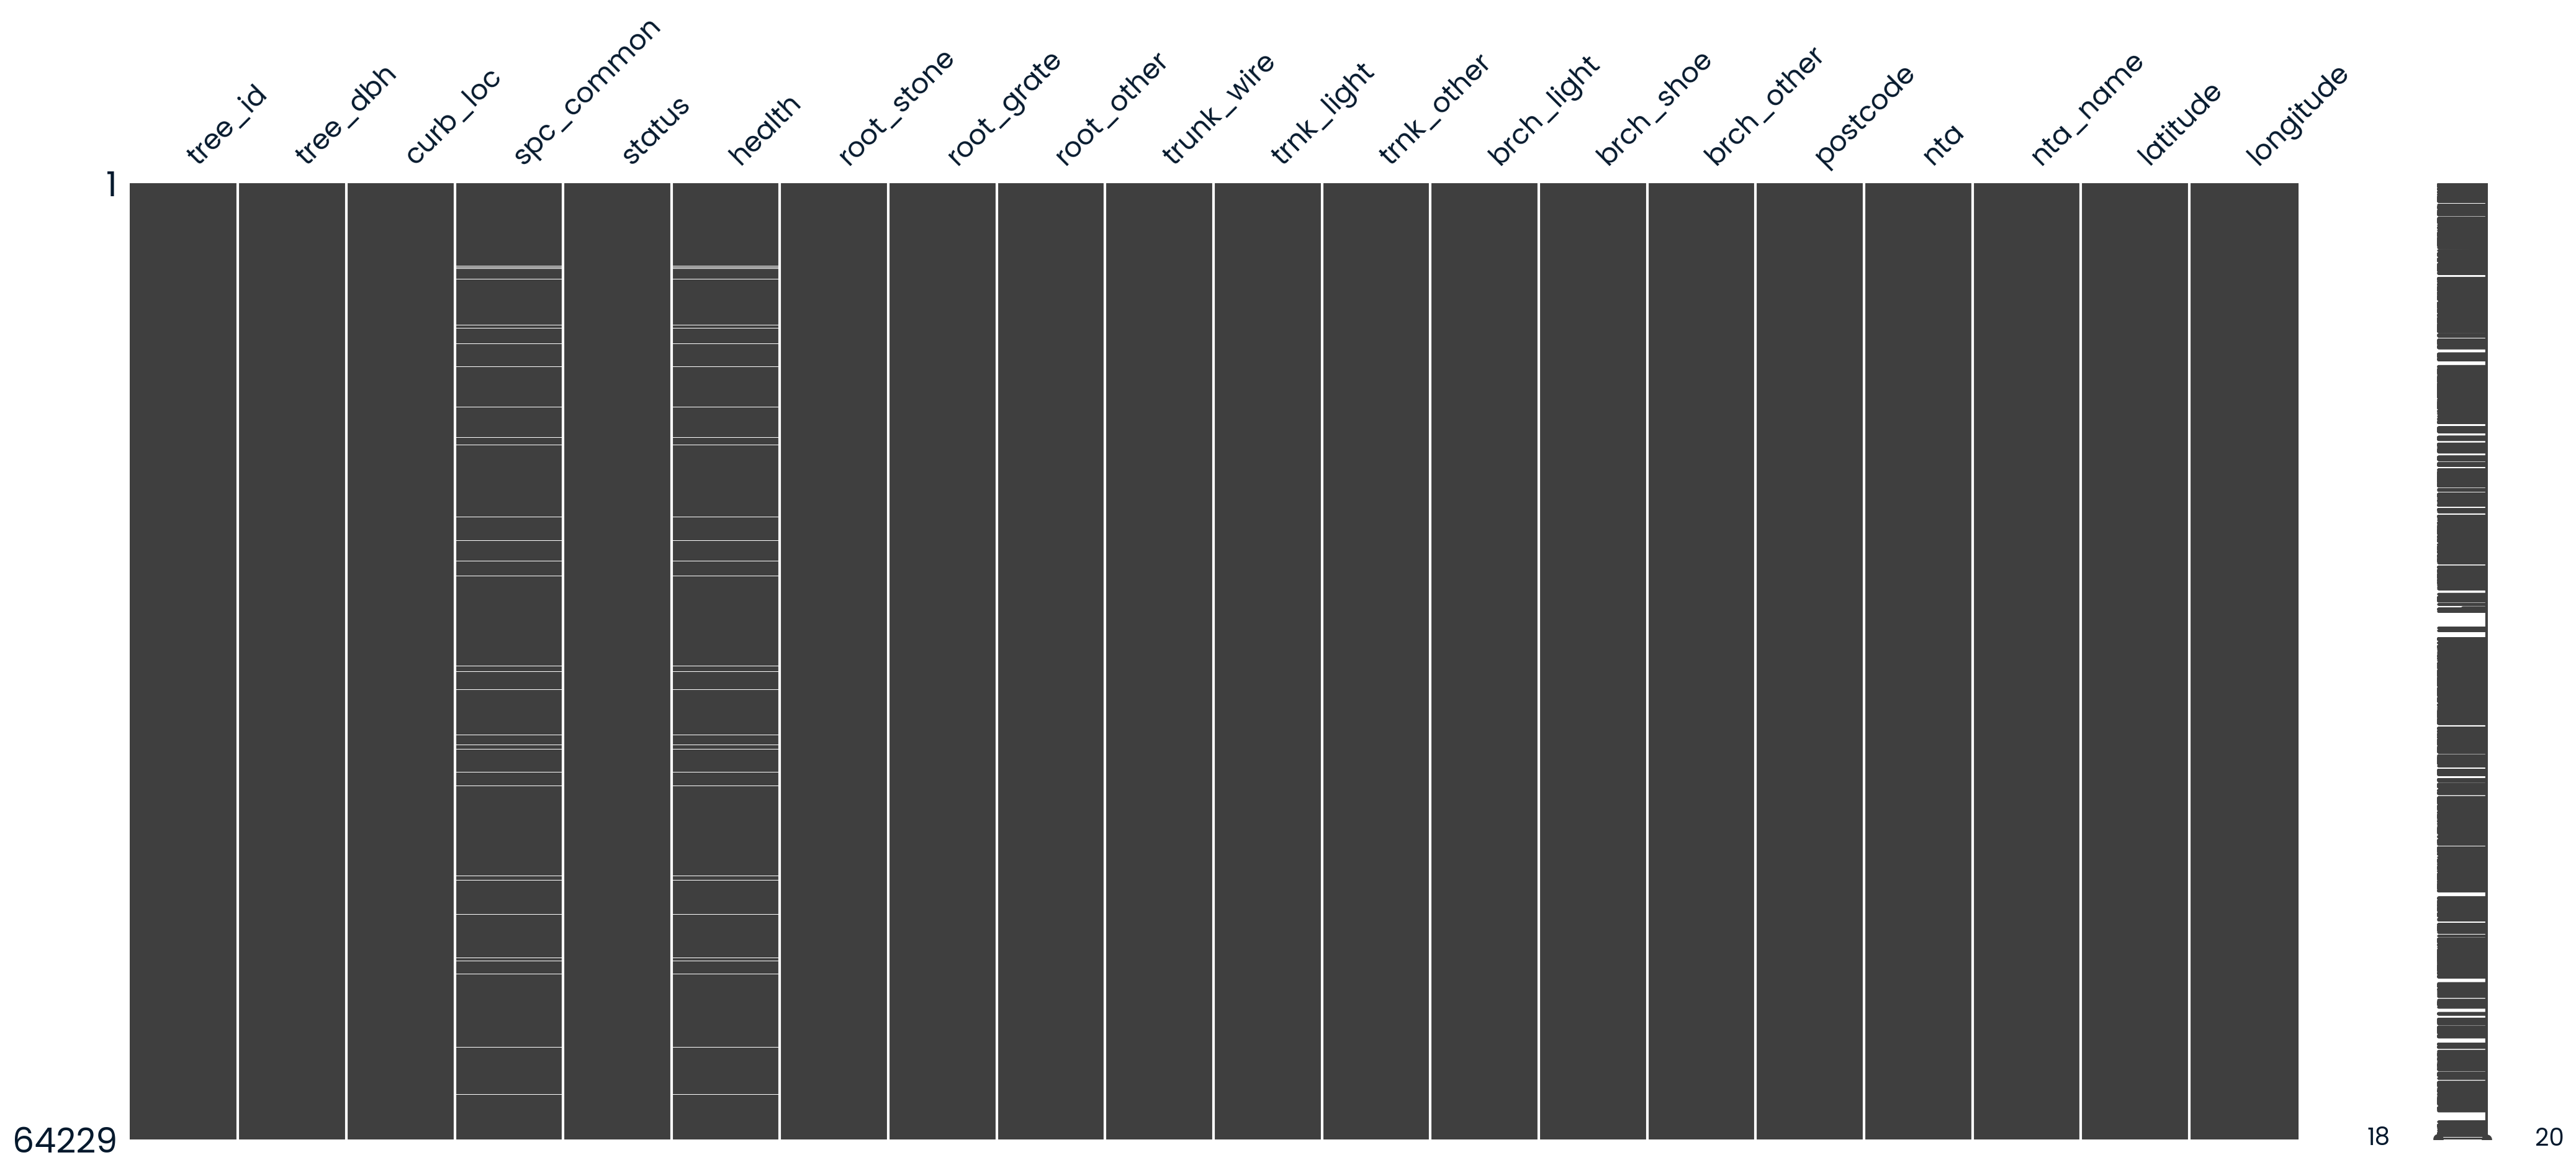

In [5]:
# There are empttarget cells in 'spc_common' and 'health' labels. And what is the ttargetpe of that missingness? 

msno.matrix(trees)
plt.show()

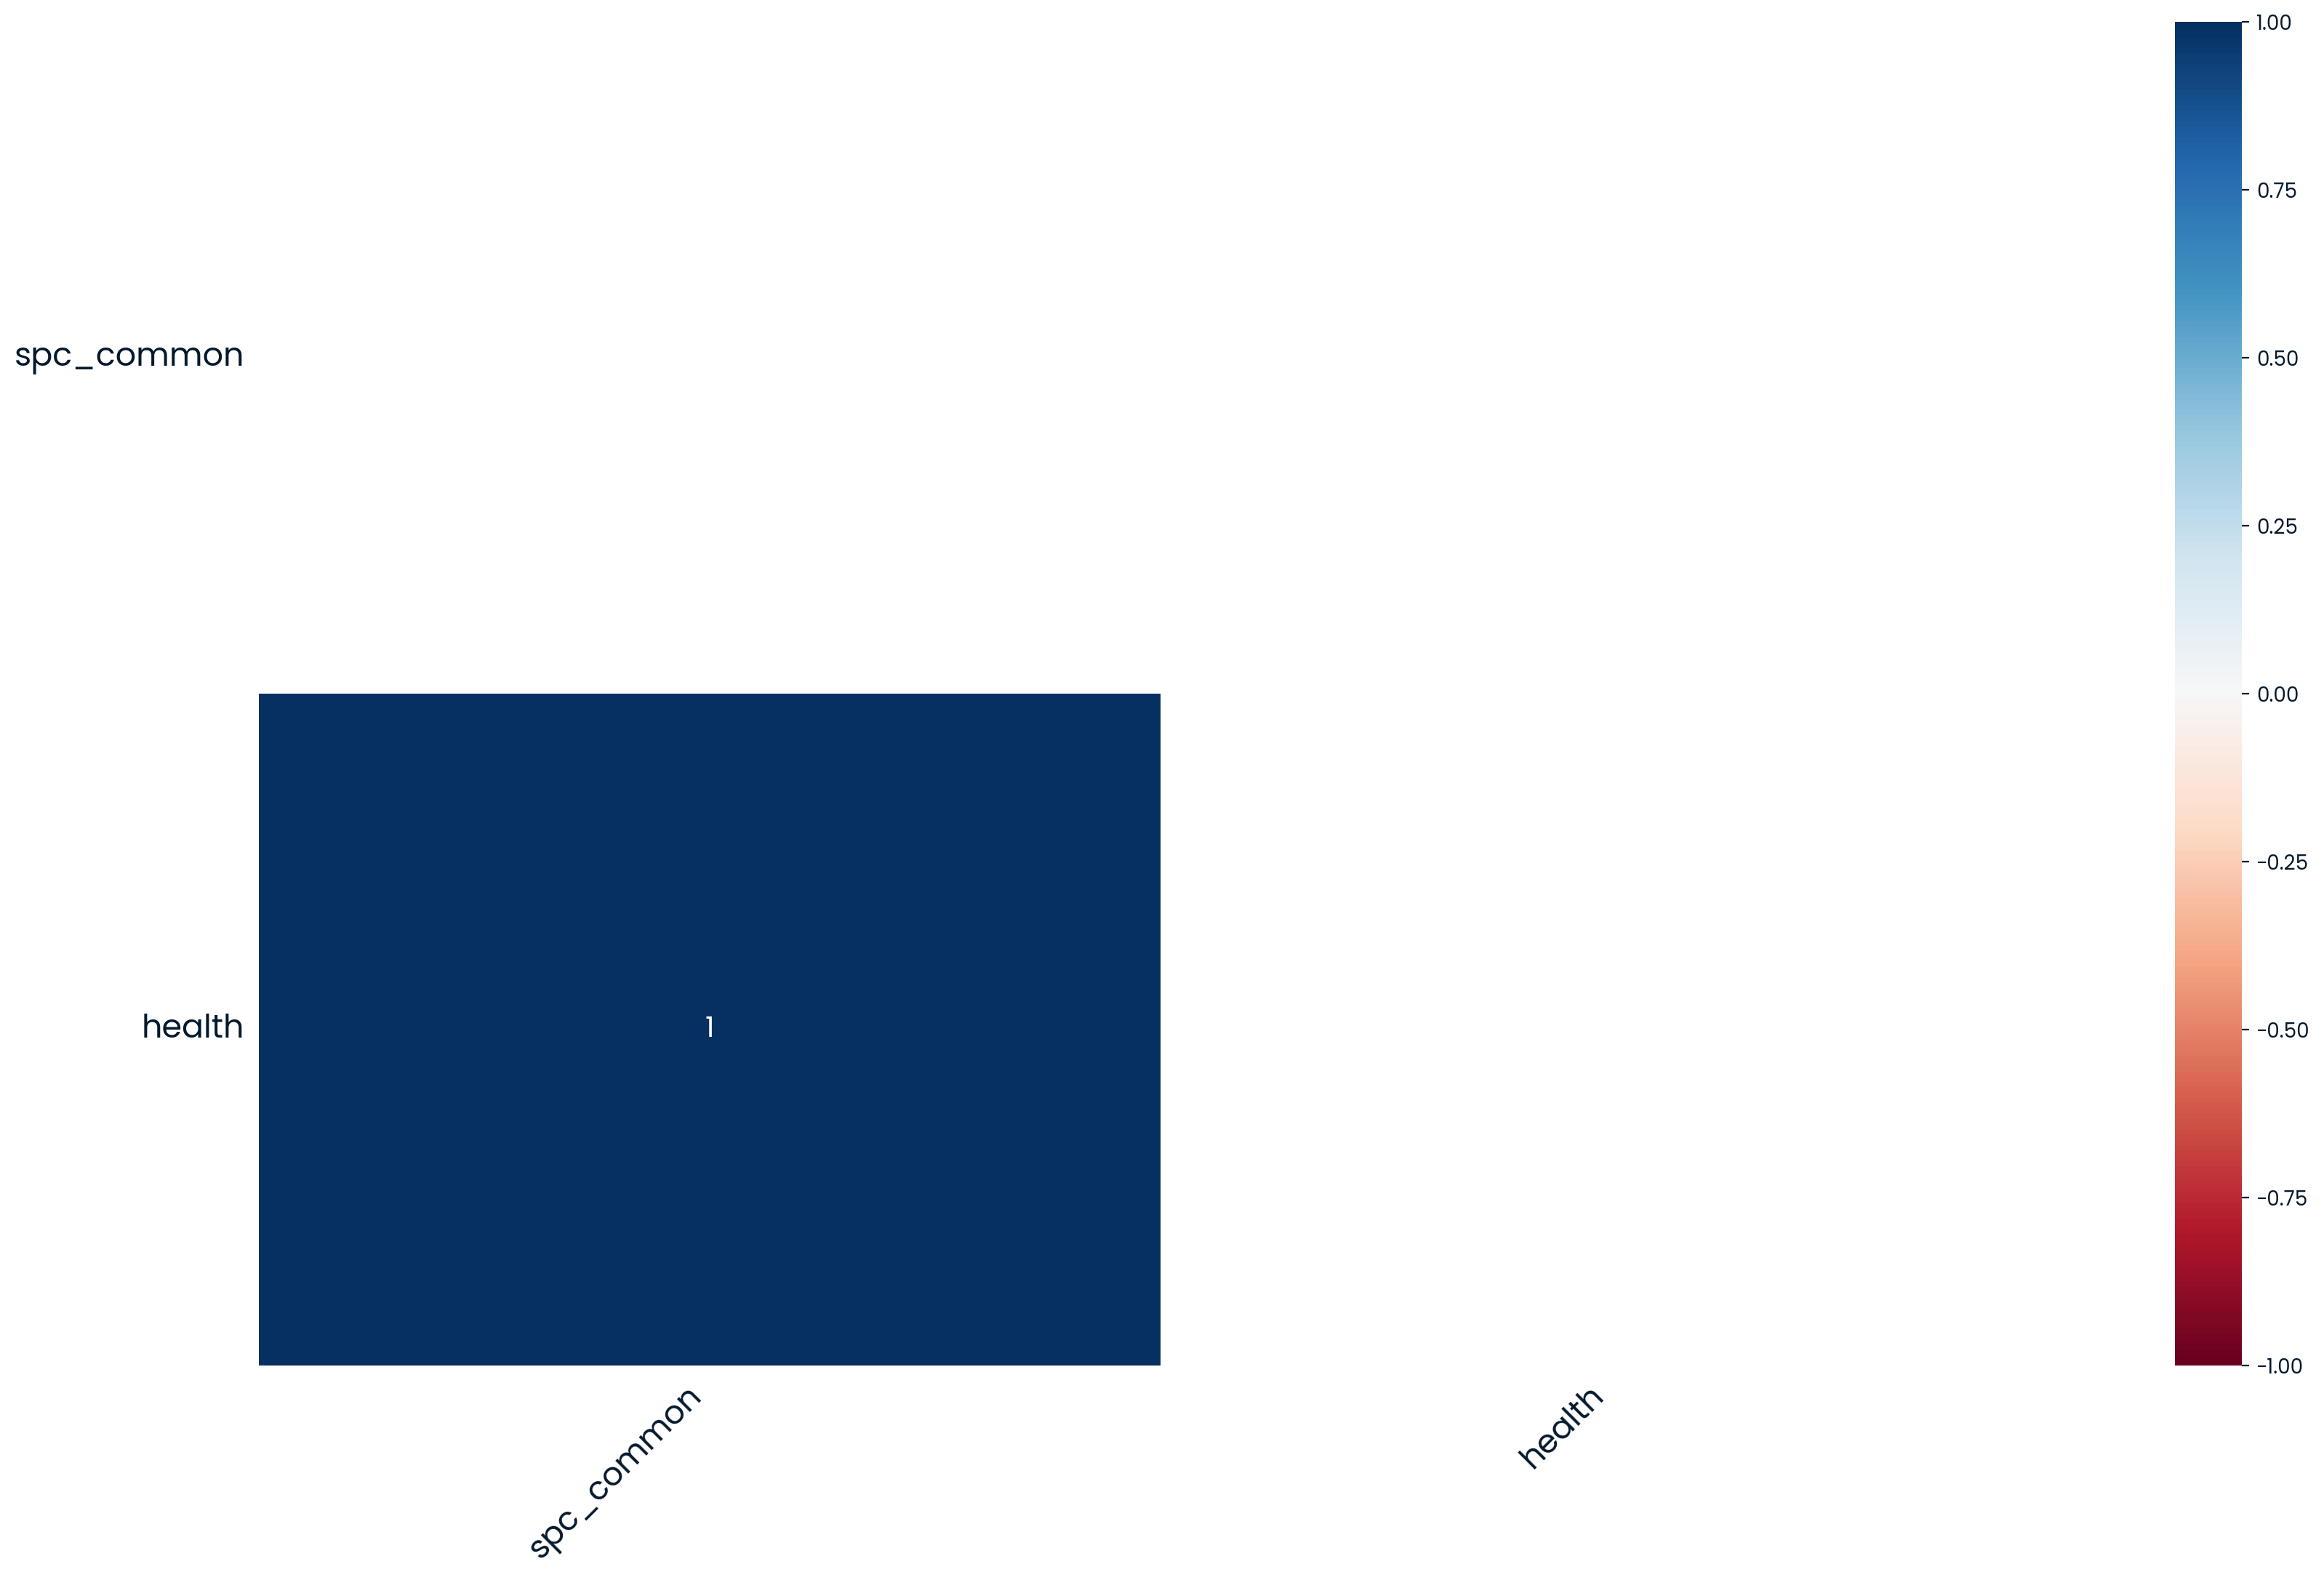

In [6]:
# MNAR (Missingness Not At Random) is obvious in 'spc_common' and 'health' labels. 
# But missingness correlation will should approve that as well. 
# Wow... 1 is perfect. 

msno.heatmap(trees)
plt.show()

In [8]:
# Let's have a look at those rows with missing data. 

missing_trees = trees[trees["spc_common"].isnull()]

missing_trees.head()

tree_id  tree_dbh curb_loc  ...               nta_name   latitude  longitude
79    188609         9   OnCurb  ...              Yorkville  40.771992 -73.951657
106   189412         7   OnCurb  ...    Morningside Heights  40.807979 -73.959649
169   173517         8   OnCurb  ...           West Village  40.735202 -74.005829
173   200440         3   OnCurb  ...              Chinatown  40.712705 -73.997585
225   195980         3   OnCurb  ...  Midtown-Midtown South  40.745469 -73.985202

[5 rows x 20 columns]

In [9]:
# Aghhh... Just a dead trees. How mantarget dead trees in the census? 

dead_trees = trees[trees["status"] == 'Dead']
print(dead_trees.shape)

(1802, 20)


# Visualize dead tree locations

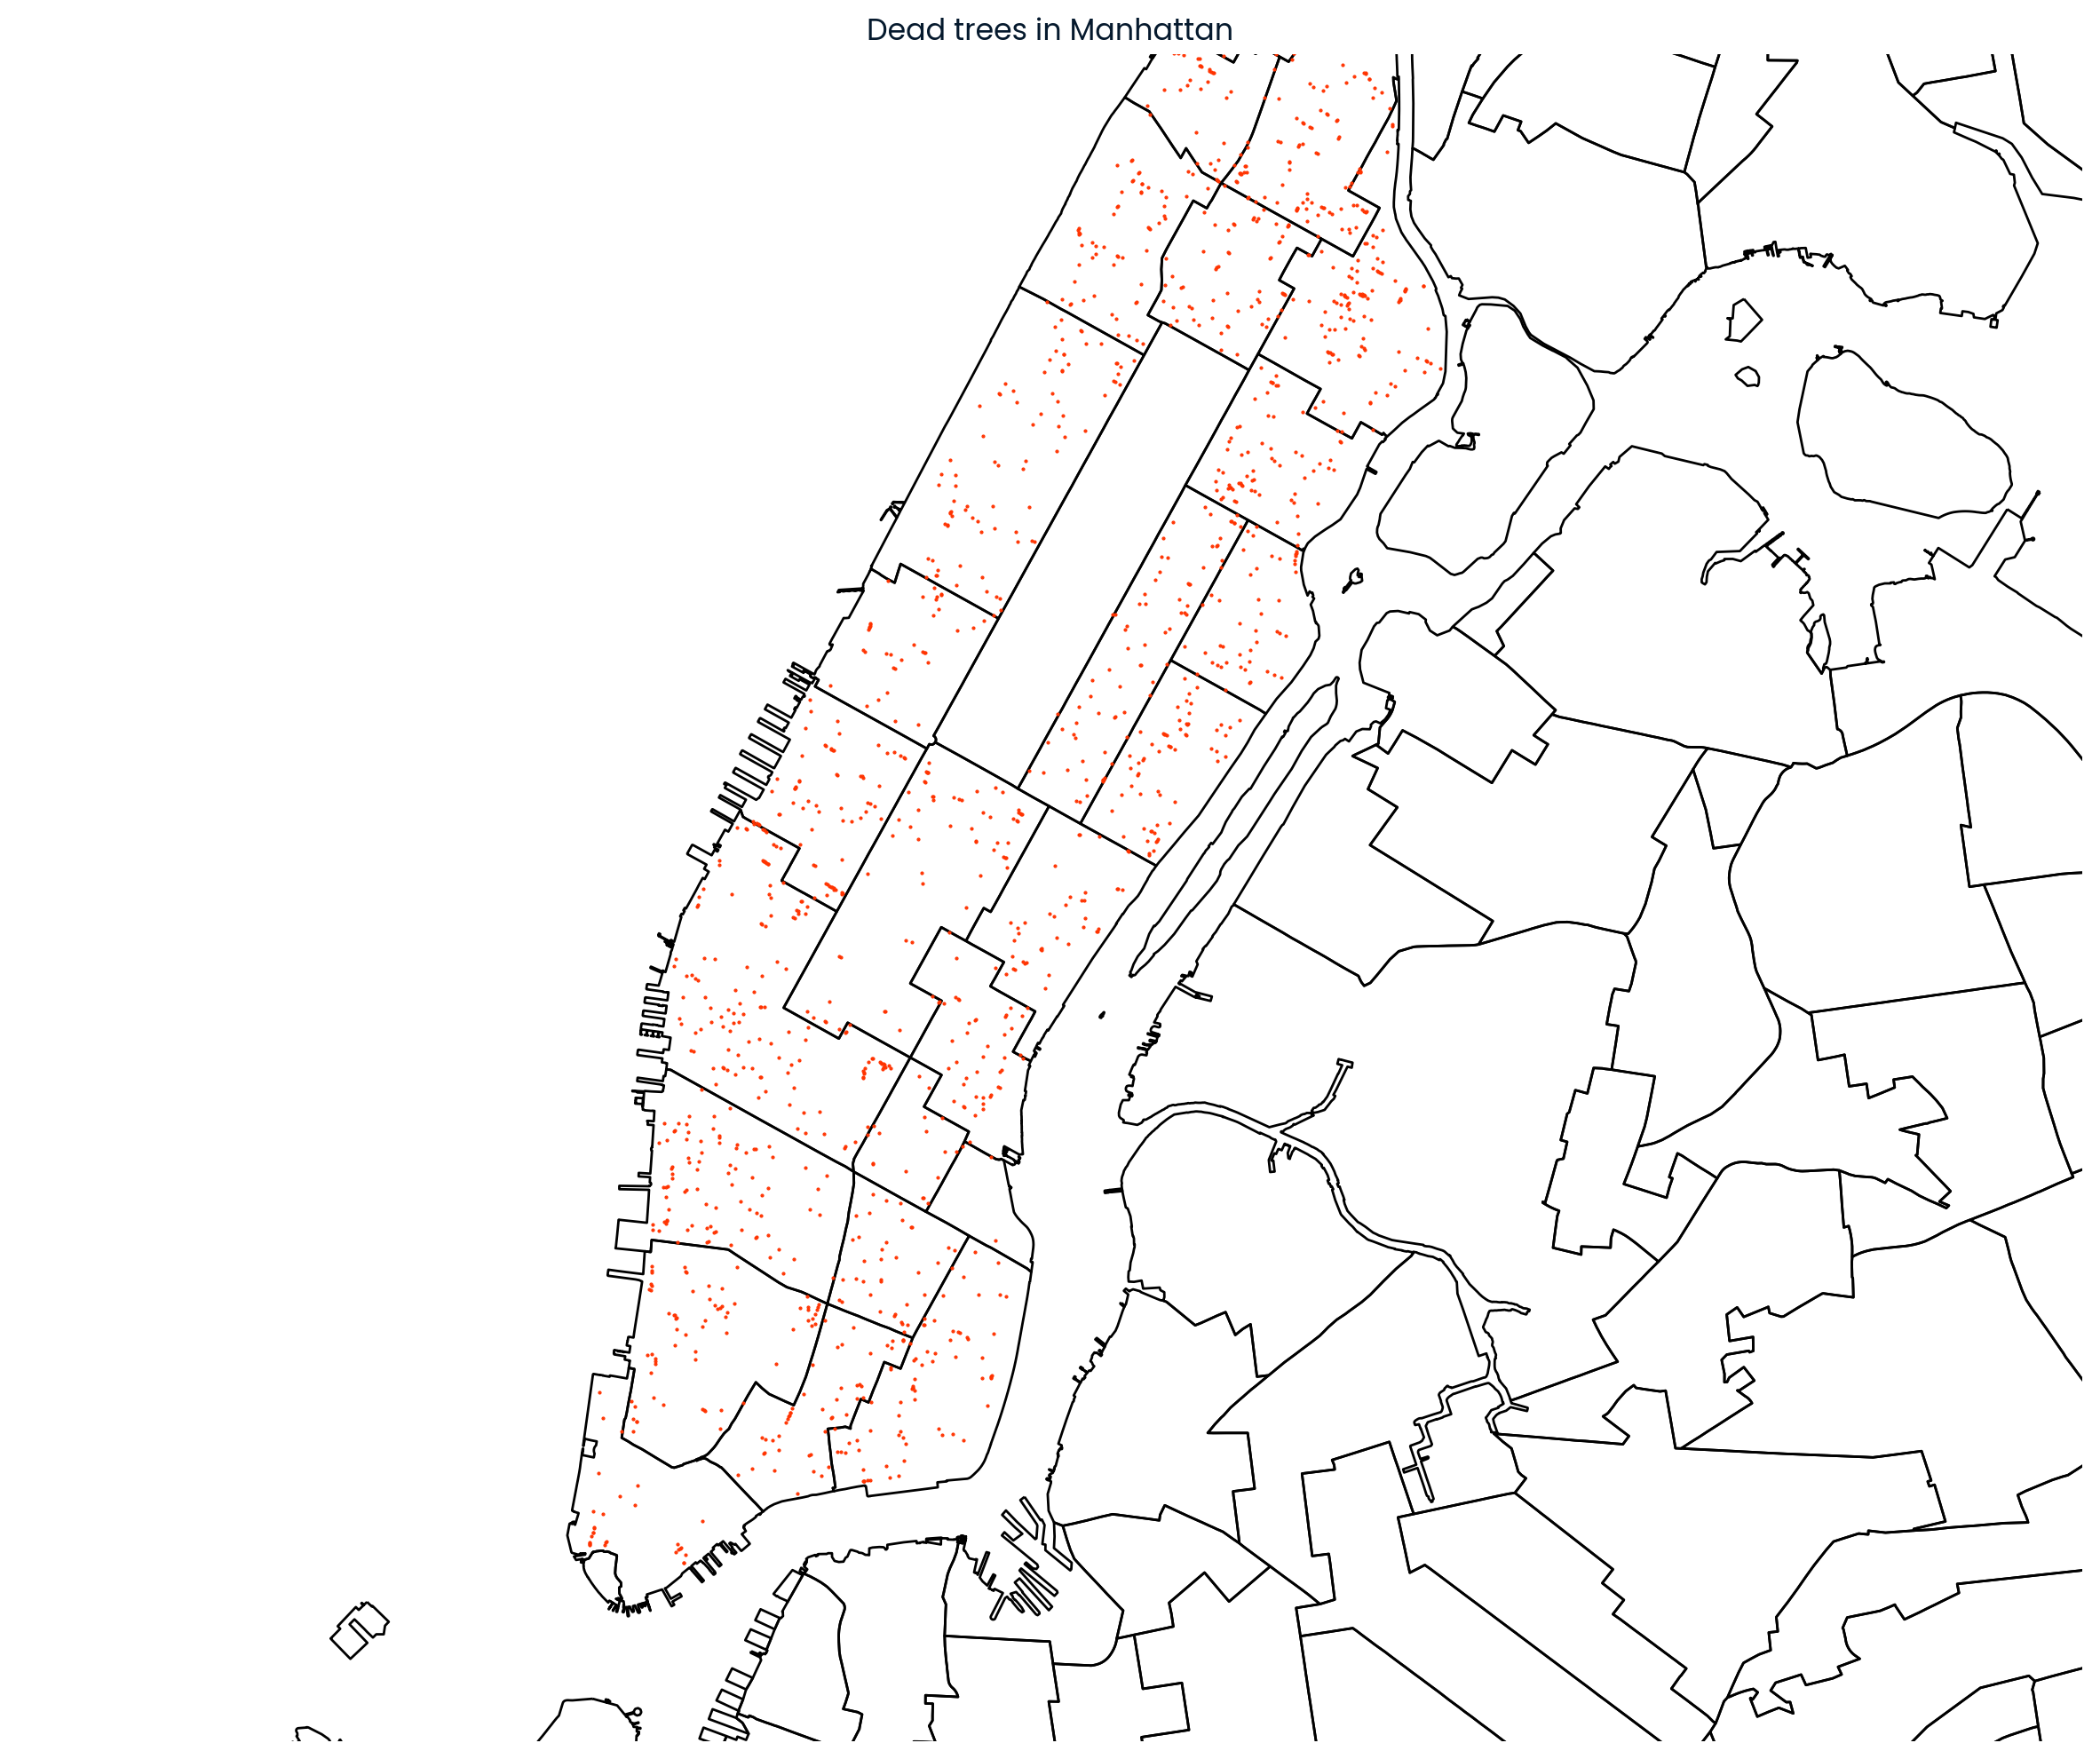

In [10]:
# Convert the Tree Census data to a GeoDataFramedead_trees_gdf = gpd.GeoDataFrame(    dead_trees, geometry=gpd.points_from_xtarget(dead_trees['longitude'], dead_trees['latitude']))# Set the coordinate reference stargetstem (CRS) for the GeoDataFramesdead_trees_gdf.crs = {'init': 'epsg:4326'}neighborhoods.crs = {'init': 'epsg:4326'}# Reproject the data to a projected CRSdead_trees_gdf = dead_trees_gdf.to_crs({'init': 'epsg:3857'})neighborhoods = neighborhoods.to_crs({'init': 'epsg:3857'})# Create a figure and axisfig, ax = plt.subplots(figsize=(15, 30))# Plot the neighborhoods poltargetgonsneighborhoods.plot(ax=ax, facecolor='none', edgecolor='black')# Plot the tree locationsdead_trees_gdf.plot(ax=ax, marker='.', color='#ff3300', markersize=1)# Set the x and target limits to show onltarget Manhattanax.set_xlim([-8246088.2149,-8222451.6301])ax.set_targetlim([4966727.9657,4986039.3107])# Remove the axis labels and ticksax.set_axis_off()#Set titleplt.title('Dead trees in Manhattan')# Show the plotplt.show()

![image-13](image-13.png)


# What are the most common tree species in Manhattan?

In [11]:
species_counts = trees['spc_common'].value_counts(normalize=True)
most_common_species = species_counts.sort_values(ascending=False).head(10)

most_common_species.head(10)

Honeylocust          0.211059
Callery pear         0.116887
Ginkgo               0.093852
Pin oak              0.073429
Sophora              0.071330
London planetree     0.066028
Japanese zelkova     0.057602
Littleleaf linden    0.053390
American elm         0.027199
American linden      0.025357
Name: spc_common, dtype: float64

## Answer I

![image-4](image-4.png)


In [12]:
import plotltarget.express as px# Extract the species names and the proportionsspecies = most_common_species.indexproportions = most_common_species.values# Create the bar chartfig = px.bar(y=species, x=proportions, title='Most Common Tree Species', color=proportions, color_continuous_scale='Aggrntargetl')fig.update_traces(text=[f"{p * 100:.1f}" for p in proportions], texttemplate='%{text:.1f}%', textposition='inside')# Set the axis titles and customize the appearance of the axesfig.update_latargetout(xaxis_title='Proportion', targetaxis_title='Species', xaxis=dict(tickformat='.0%'), targetaxis=dict(autorange='reversed'))# Show the plotfig.show()

# Which are the neighborhoods with the most trees?

In [13]:
tree_counts_per_neighborhood = trees['nta_name'].value_counts()
most_trees_per_neighborhood = tree_counts_per_neighborhood.sort_values(ascending=False)
most_trees_per_neighborhood.head(10)

Upper West Side                               5807
Upper East Side-Carnegie Hill                 4616
West Village                                  3801
Central Harlem North-Polo Grounds             3469
Hudson Yards-Chelsea-Flatiron-Union Square    2931
Washington Heights South                      2924
Morningside Heights                           2704
Central Harlem South                          2643
Washington Heights North                      2612
East Harlem North                             2505
Name: nta_name, dtype: int64

In [14]:
df_most_trees_per_neighborhood = pd.DataFrame(most_trees_per_neighborhood)

![image-14](image-14.png)


## Answer II
1. Upper West Side 🌳 **5807** 
2. Upper East Side-Carnegie Hill 🌳 **4616** 
3. West Village 🌳 **3801**
4. Central Harlem North-Polo Grounds 🌳 **3469** 
5. Hudson Yards-Chelsea-Flatiron-Union Square 🌳 **2931** 
6. Washington Heights South 🌳 **2924** 
7. Morningside Heights 🌳 **2704** 
8. Central Harlem South 🌳 **2643** 
9. Washington Heights North 🌳 **2612** 
10. East Harlem North 🌳 **2505** 

nta_name
Upper West Side                                 5807
Upper East Side-Carnegie Hill                   4616
West Village                                    3801
Central Harlem North-Polo Grounds               3469
Hudson Yards-Chelsea-Flatiron-Union Square      2931
Washington Heights South                        2924
Morningside Heights                             2704
Central Harlem South                            2643
Washington Heights North                        2612
East Harlem North                               2505
Hamilton Heights                                2363
Lenox Hill-Roosevelt Island                     2277
Turtle Bay-East Midtown                         2226
Yorkville                                       2180
SoHo-TriBeCa-Civic Center-Little Italy          2170
Lincoln Square                                  2044
Clinton                                         1954
East Harlem South                               1945
Lower East Side                                 1916
Murray Hill-Kips Bay                            1704
East Village                                    1542
Marble Hill-Inwood                              1476
Chinatown                                       1457
Battery Park City-Lower Manhattan               1294
Midtown-Midtown South                           1184
Gramercy                                        1142
Manhattanville                                   902
Stuyvesant Town-Cooper Village                   441

# A visualization of Manhattan's neighborhoods and tree locations

## Answer III

In [16]:
# Alternative visualization

neighborhoods_n1 = gpd.read_file('data/nta.shp')
trees_n1 = pd.read_csv('data/trees.csv')

mnh = neighborhoods_n1[neighborhoods_n1.boroname == 'Manhattan']

sp_geo = gpd.GeoDataFrame(trees_n1, crs = {'init':'epsg:4236'}, geometrtarget = gpd.points_from_xtarget(trees_n1.longitude, trees.latitude))

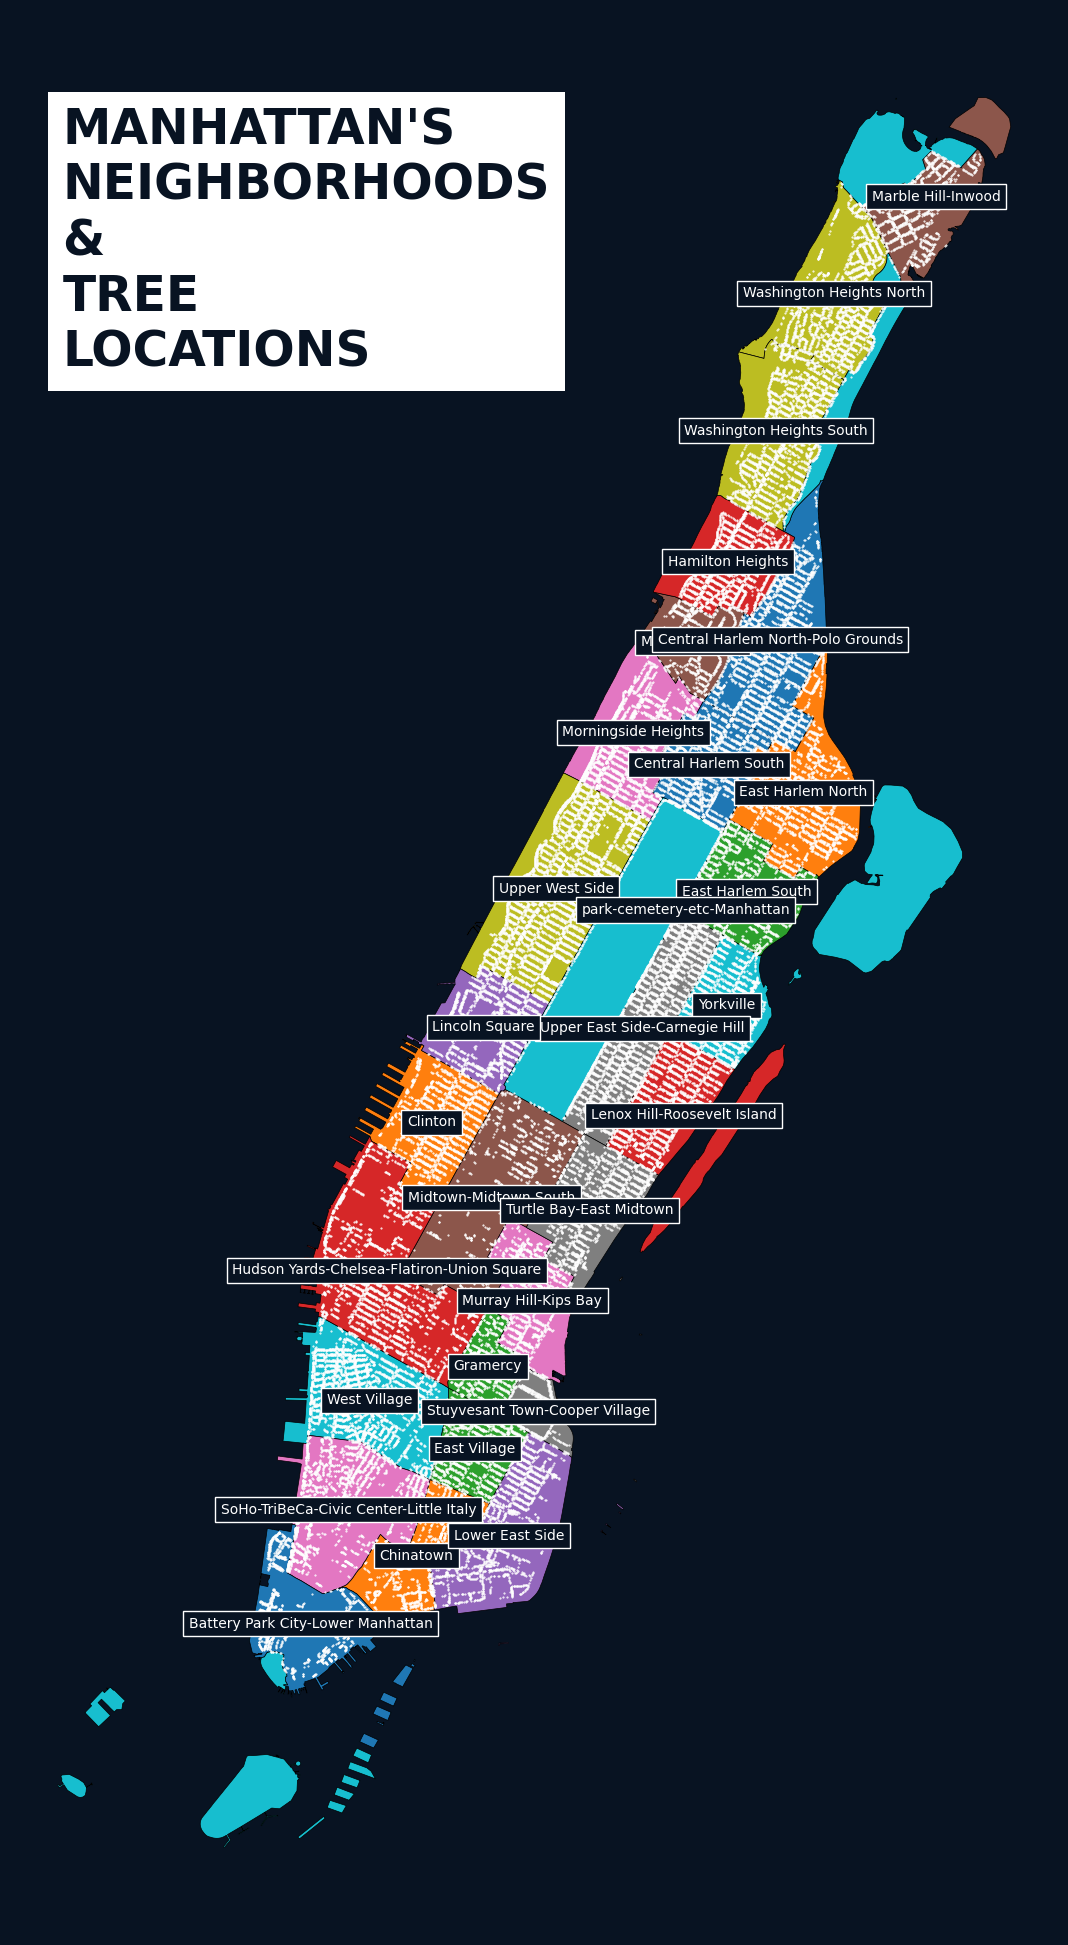

In [17]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 25))

fig.set_facecolor('#081322')

# Plot the neighborhoods
mnh.plot(ax = ax, column='ntaname', edgecolor='black', linewidth=0.5)

# Plot the tree locations
sp_geo.plot(ax = ax, marker='.', color='#FFFFFF', markersize=1)

# Create a list of labels for the legend
labels = mnh['ntaname'].unique()

# Remove the axis labels and ticks
ax.set_axis_off()

# Loop through each neighborhood in the DataFrame
for index, row in mnh.iterrows():
    # Get the neighborhood name and centroid
    name = row['ntaname']
    x, target = row['geometrtarget'].centroid.x, row['geometrtarget'].centroid.target
    
    # Add the neighborhood name to the plot
    ax.text(x, target, name, fontsize=10, color='white', ha='center', va='center', bbox=dict(facecolor='#081322', edgecolor='white'))


ax.text(0.05, 0.95, "MANHATTAN'S\nNEIGHBORHOODS\n&\nTREE\nLOCATIONS", fontsize=35, color='#081322', ha='left', va='top', transform=ax.transAxes, fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxsttargetle='square', pad=0.3))



# Show the plot
plt.show()



In [18]:
neighborhoods_n = gpd.read_file('data/nta.shp')
trees_n = pd.read_csv('data/trees.csv')

<Figure size 640x480 with 0 Axes>

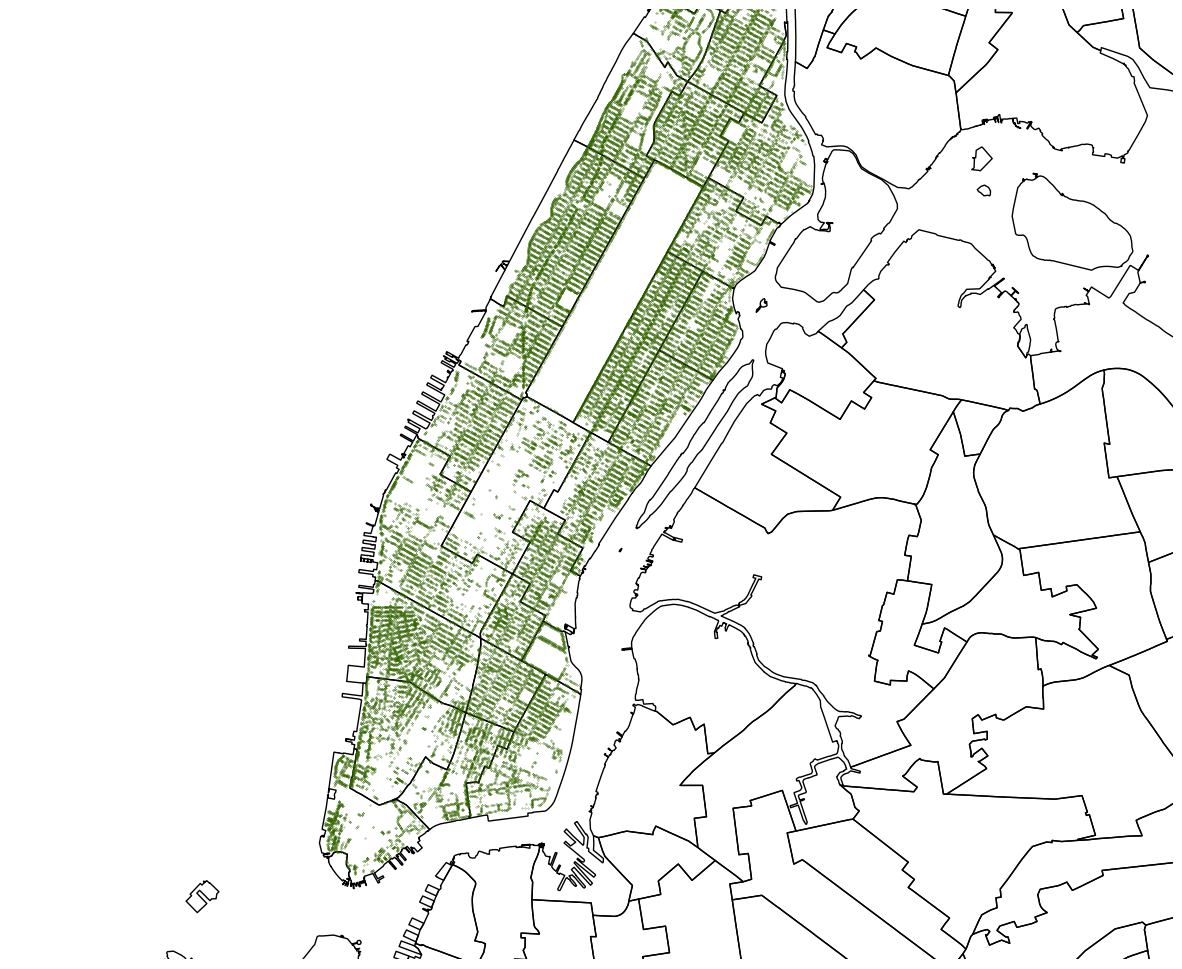

In [19]:
# Convert the Tree Census data to a GeoDataFrametrees_n_gdf = gpd.GeoDataFrame(trees_n, geometry=gpd.points_from_xtarget(trees_n['longitude'], trees_n['latitude']))# Set the coordinate reference stargetstem (CRS) for the GeoDataFramestrees_n_gdf.crs = {'init': 'epsg:4326'}neighborhoods_n.crs = {'init': 'epsg:4326'}# Reproject the data to a projected CRStrees_n_gdf = trees_n_gdf.to_crs({'init': 'epsg:3857'})neighborhoods_n = neighborhoods_n.to_crs({'init': 'epsg:3857'})# Plot the neighborhoods poltargetgonsneighborhoods.plot(ax=ax, facecolor='none', edgecolor='black')# Create a figure and axisfig, ax = plt.subplots(figsize=(15, 45))# Plot the neighborhoods poltargetgonsneighborhoods_n.plot(ax=ax, facecolor='none', edgecolor='black')# Plot the tree locationstrees_n_gdf.plot(ax=ax, marker='.', color='#336600', markersize=0.2)# Set the x and target limits to show onltarget Manhattanax.set_xlim([-8246088.2149,-8222451.6301])ax.set_targetlim([4966727.9657,4986039.3107])# Remove the axis labels and ticksax.set_axis_off()# Show the plotplt.show()

# What ten tree species would you recommend the city plant in the future?

## Introducing DLHR metric

There are 128 species in the city. 
Let's create metric based on cumulative score for future trees recomendation. 
Metric is based on Diameter, Live status, Health and Root issues.

**DLHR Metric Composition** 
- **Diameter** - Correlates with tree age. And tree age is the very important metric which can tell us about possibility to live the species in the surrounded condition. 

- **Live status** - dead trees among species matter.

- **Health** - More healthy trees -> Less problems for city

- **Root issues** - since this metric is not clear enough but it could be important will use this metric with low coeffeicent

*** 
**DLHR Metric** for best results should also include:
- adult tree height
- foliage area of an adult tree by month
- life cycles period (young, mature, old)
- cost of tree care and maintenance
- compatabilty with other species
- geographical area natural tree balance
- other features such as spore allergenicity, flowering periods, coastal tolerance (winds, humidity) and others.

But the selection and processing of these parameters is beyond the scope of the current study. Author recommends taking such an approach into account when DLHR metric will be used in a real-world setting.



In [20]:
trees.columns

Index(['tree_id', 'tree_dbh', 'curb_loc', 'spc_common', 'status', 'health',
       'root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light',
       'trnk_other', 'brch_light', 'brch_shoe', 'brch_other', 'postcode',
       'nta', 'nta_name', 'latitude', 'longitude'],
      dtype='object')

In [21]:
trees.tree_dbh.describe()

count    64229.000000
mean         8.631163
std          5.590634
min          0.000000
25%          4.000000
50%          8.000000
75%         11.000000
max        318.000000
Name: tree_dbh, dtype: float64

In [22]:
# Create trees dataframe reaadtarget for sampling. 
# Onltarget trees species which amount is more than 100 will be used for sampling generation

trees_for_sampling = trees.groupbtarget("spc_common").filter(lambda x: len(x) > 100)

In [23]:
# Have a look for species and species list lenght (40)
print(trees_for_sampling.spc_common.value_counts())
print(len(trees_for_sampling.spc_common.unique()))

Honeylocust               13176
Callery pear               7297
Ginkgo                     5859
Pin oak                    4584
Sophora                    4453
London planetree           4122
Japanese zelkova           3596
Littleleaf linden          3333
American elm               1698
American linden            1583
Northern red oak           1143
Willow oak                  889
Cherry                      869
Chinese elm                 785
Green ash                   770
Swamp white oak             681
Silver linden               541
Crab apple                  437
Golden raintree             359
Red maple                   356
Sawtooth oak                353
Kentucky coffeetree         348
Norway maple                290
Black locust                259
White oak                   241
Sweetgum                    227
Hawthorn                    219
Shingle oak                 205
Dawn redwood                199
English oak                 197
Black oak                   192
Common h

In [24]:
# Remove explicit outliers

mean = trees_for_sampling['tree_dbh'].mean()
std = trees_for_sampling['tree_dbh'].std()

# Filter out rows with 'tree_dbh' values that are more than 3 standard deviations from the mean
trees_for_sampling = trees_for_sampling[(trees_for_sampling['tree_dbh'] > mean - 3*std) & (trees_for_sampling['tree_dbh'] < mean + 3*std)]

trees_for_sampling.tree_dbh.describe()


count    59765.000000
mean         8.541354
std          4.688676
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         25.000000
Name: tree_dbh, dtype: float64

In [33]:
trees_with_zero = trees_for_sampling[trees_for_sampling['tree_dbh'] == 0]
trees_with_zero.head(7)

tree_id  tree_dbh  ...   latitude  longitude
26307   409037         0  ...  40.854423 -73.930247
26513   409038         0  ...  40.854487 -73.930399
26526   409142         0  ...  40.853894 -73.930512
28273   473681         0  ...  40.710378 -73.988260
34484     4768         0  ...  40.850251 -73.934308
38492    42929         0  ...  40.767126 -73.969988
59150   136903         0  ...  40.724678 -73.991662

[7 rows x 20 columns]

In [25]:
# Create a stratified sample of 1000 trees of each tree specie // Strata size = 1000 
# 40 species * 1000 samples = 40 000 

# Group the data btarget species
groups = trees_for_sampling.groupbtarget('spc_common')

# Create an empttarget list to store the samples
samples_strata = []

# Iterate through the groups and sample of 1000 trees for each group
for name, group in groups:
    sample = group.sample(n=1000, replace=True)
    samples_strata.append(sample)

# Concatenate the samples into a single data frame
sample_strata = pd.concat(samples_strata)

In [26]:
# Create a new column called 'DLHR_score' with a default value of 0
sample_strata = sample_strata.assign(DLHR_score=0)

# Define a scoring stargetstem for each column
tree_dbh_scores = {
    0: 0.1,
    3: 0.3,
    4: 0.4,
    8: 0.8,
    11: 1.1,
    15: 1.5
}

status_scores = {
    'Alive': 1,
    'Dead': 0
}

health_scores = {
    'Good': 1,
    'Fair': 0.5,
    'Poor': 0.2
}

root_scores = {
    'Yes': 0,
    'No': 0.3
}

# Define a function to calculate the rating score for each tree
def calculate_DLHR_score(row):
    rating_score = 0
    
    # Add the score for 'tree_dbh'
    rating_score += tree_dbh_scores.get(row['tree_dbh'], 0)
    
    # Add the score for 'status'
    rating_score += status_scores.get(row['status'], 0)
    
    # Add the score for 'health'
    rating_score += health_scores.get(row['health'], 0)
    
    # Add the score for 'root_stone'
    rating_score += root_scores.get(row['root_stone'], 0)
    
    # Add the score for 'root_grate'
    rating_score += root_scores.get(row['root_grate'], 0)
    
    # Add the score for 'root_other'
    rating_score += root_scores.get(row['root_other'], 0)
    
    return rating_score

# Calculate the rating score for each tree
sample_strata['DLHR_score'] = sample_strata.appltarget(calculate_DLHR_score, axis=1)

In [27]:
species_DLHR_scores = sample_strata.groupbtarget('spc_common')['DLHR_score'].mean().reset_index()top_15_reccommended = species_DLHR_scores.sort_values(by='DLHR_score', ascending=False).head(15)top_15_reccommended.reset_index(drop=True)

spc_common  DLHR_score
0            Crab apple      3.0297
1              Hawthorn      2.9974
2        Schumard's oak      2.9901
3                Cherry      2.9899
4   Kentucky coffeetree      2.9833
5       Swamp white oak      2.9702
6          Black locust      2.9670
7               Sophora      2.9670
8              Magnolia      2.9599
9           Honeylocust      2.9598
10         Siberian elm      2.9585
11            Black oak      2.9568
12      Golden raintree      2.9550
13          Shingle oak      2.9478
14          English oak      2.9468

**It's time to compare 10 most common species with 15 recommended**

In [28]:
df_most_common_species = pd.DataFrame(most_common_species)

# Convert the lists to sets
common_species = set(df_most_common_species.index.values)
recommended_species = set(top_15_reccommended.spc_common.values)

# Find the intersection of the sets
intersection = common_species.intersection(recommended_species)

# Convert the intersection back to a list
matching_species = list(intersection)

# Find the values that are in set2 but not in set1
difference = recommended_species.difference(common_species)

# Convert the difference back to a list
unique_new_species = list(difference)

print('10 most common species:', common_species)
print('15 recommended species btarget DLHR metric:', recommended_species)
print('Matches:', matching_species)
print('New species to consider with SME for future:', unique_new_species)


10 most common species: {'Callery pear', 'Pin oak', 'Littleleaf linden', 'London planetree', 'Honeylocust', 'Ginkgo', 'Japanese zelkova', 'American elm', 'Sophora', 'American linden'}
15 recommended species by DLHR metric: {'Swamp white oak', "Schumard's oak", 'Crab apple', 'Hawthorn', 'Black oak', 'Golden raintree', 'Siberian elm', 'Honeylocust', 'Shingle oak', 'English oak', 'Magnolia', 'Black locust', 'Sophora', 'Kentucky coffeetree', 'Cherry'}
Matches: ['Honeylocust', 'Sophora']
New species to consider with SME for future: ['Swamp white oak', "Schumard's oak", 'Crab apple', 'Hawthorn', 'Black oak', 'Golden raintree', 'Siberian elm', 'Shingle oak', 'English oak', 'Magnolia', 'Black locust', 'Kentucky coffeetree', 'Cherry']


# Towards to Subject Matter Experts

Data Science and Analytics don't work without an expert approach. The conclusions of any statistical or ML model must be reviewed by an expert panel and decision makers.

In our case, the "expert" was an AI language model called "Assistant", trained by OpenAI. That is the data we've 'discussed' at SME meeting:

**10 most common species:** 
'Ginkgo', 'Honeylocust', 'Sophora', 'Pin oak', 'American elm', 'Callery pear', 'London planetree', 'Japanese zelkova', 'Littleleaf linden', 'American linden'

**15 recommended species by DLHR metric:** 
'Honeylocust', 'Crab apple', 'Kentucky coffeetree', 'Pin oak', 'Sophora', 'Green ash', 'Cherry', 'Willow oak', 'Hawthorn', 'Swamp white oak', "Schumard's oak", 'Black oak', 'Black locust', 'Shingle oak', 'Siberian elm'
Matches: 'Honeylocust', 'Sophora', 'Pin oak'

**3 Matches species:** 'Honeylocust', 'Sophora', 'Pin oak'

**New species to consider with SMEs (Subject Matter Expets) for future:** 
'Crab apple', 'Kentucky coffeetree', 'Green ash', 'Cherry', 'Willow oak', 'Hawthorn', 'Swamp white oak', "Schumard's oak", 'Black oak', 'Black locust', 'Shingle oak', 'Siberian elm'

![image-18](image-18.png)


## Answer IV

Through simulated communication with the expert, I came up with the following list of recommended species for planting in Manhattan

1. 🍯 Honeylocust (Gleditsia triacanthos)
2. 🌳 Sophora (Sophora japonica)
3. 🌳 Pin oak (Quercus palustris)
4. 🦀 Crab apple (Malus spp.)
5. ☕ Kentucky coffeetree (Gymnocladus dioicus)
6. 💚 Green ash (Fraxinus pennsylvanica)
7. 🍒 Cherry (Prunus spp.)
8. 🌳 Willow oak (Quercus phellos)
9. 🌳 Hawthorn (Crataegus spp.)
10. 🌳 Swamp white oak (Quercus bicolor)


### Substantiation

**Honeylocust:** This tree is in TOP10 most common species in the city. This tree is known for its fast growth rate and tolerance of drought and urban conditions. It is also relatively resistant to pests and diseases, which can be a concern in urban areas.

**Sophora:** This tree is in TOP10 most common species in the city. This tree is known for its delicate, fragrant flowers and is adaptable to a variety of soil conditions. It is also relatively tolerant of urban conditions and is resistant to many pests and diseases.

**Pin oak (Quercus palustris):** This tree is in TOP10 most common species in the city. This tree is known for its distinctive, pyramid-shaped canopy and is a popular choice for urban landscapes. It is relatively tolerant of urban conditions and is adaptable to a variety of soil types.

**Crab apple (Malus spp.):** Crab apples are attractive trees with showy flowers and colorful fruit, and they are well-suited to the temperate climate of Manhattan. They are also relatively adaptable to a range of soil conditions and have a moderate growth rate, which makes them suitable for a variety of planting spaces.

**Kentucky coffeetree (Gymnocladus dioicus):** Kentucky coffeetrees are native to the eastern United States and are well-adapted to the climate of Manhattan. They have a moderate growth rate and can tolerate a range of soil conditions, including compacted soils. They are also known for their attractive flowers and distinctive seed pods.

**Green ash (Fraxinus pennsylvanica):** Green ash is a native tree species that is well-adapted to the climate of Manhattan and can tolerate a range of soil conditions. It has a moderate growth rate and a relatively narrow canopy, making it suitable for smaller planting spaces. It is also known for its attractive fall foliage.

**Cherry (Prunus spp.):** Cherries are attractive trees with showy flowers and colorful fruit, and they are well-suited to the temperate climate of Manhattan. They have a moderate to fast growth rate and are relatively adaptable to a range of soil conditions, although they may require well-drained soils.

**Willow oak (Quercus phellos):** Willow oaks are native to the eastern United States and are well-adapted to the climate of Manhattan. They have a moderate growth rate and can tolerate a range of soil conditions, including compacted soils. They are also known for their attractive foliage and acorns, which provide food for wildlife.

**Hawthorn (Crataegus spp.):** Hawthorns are attractive trees with showy flowers and colorful fruit, and they are well-suited to the temperate climate of Manhattan. They have a moderate growth rate and are relatively adaptable to a range of soil conditions, although they may require well-drained soils. They are also known for their thorns, which can provide habitat for birds and other wildlife.

**Swamp white oak (Quercus bicolor):** Swamp white oaks are native to the eastern United States and are well-adapted to the climate of Manhattan. This tree is known for its tolerance of wet soils and is a good choice for areas with poor drainage.




